In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | alyangula
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | walla walla
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | belle glade
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | yaan
Processing Record 19 of Set 1 | siddipet
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | bluff
Processing Rec

Processing Record 36 of Set 4 | odweyne
Processing Record 37 of Set 4 | wanning
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | nyurba
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | dakar
Processing Record 44 of Set 4 | tiznit
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | daye
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | ankang
Processing Record 50 of Set 4 | khonuu
City not found. Skipping...
Processing Record 1 of Set 5 | tual
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | macapa
Processing Record 5 of Set 5 | inta
Processing Record 6 of Set 5 | saravan
Processing Record 7 of Set 5 | delijan
Processing Record 8 of Set 5 | najran
Processing Record 9 of Set 5 | saint-georges
Processing Record 10 of Set 5

Processing Record 31 of Set 8 | mitsamiouli
Processing Record 32 of Set 8 | adrar
Processing Record 33 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 34 of Set 8 | pitimbu
Processing Record 35 of Set 8 | hillsboro
Processing Record 36 of Set 8 | labutta
City not found. Skipping...
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | barra do garcas
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | pingliang
Processing Record 41 of Set 8 | bontang
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | balingasay
Processing Record 44 of Set 8 | korhogo
Processing Record 45 of Set 8 | makakilo city
Processing Record 46 of Set 8 | zholymbet
Processing Record 47 of Set 8 | opuwo
Processing Record 48 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 49 of Set 8 | vardo
Processing Record 50 of Set 8 | ondjiva
Processing Record 1 of Set 9 | celestun
Processing Record 2 of Set 9 | iranshahr
Process

Processing Record 17 of Set 12 | bafia
Processing Record 18 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 19 of Set 12 | marawi
Processing Record 20 of Set 12 | milkovo
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | kildinstroy
Processing Record 23 of Set 12 | waren
Processing Record 24 of Set 12 | hihifo
City not found. Skipping...
Processing Record 25 of Set 12 | vagur
Processing Record 26 of Set 12 | rio grande
Processing Record 27 of Set 12 | dutlwe
Processing Record 28 of Set 12 | alta floresta
Processing Record 29 of Set 12 | grasse
Processing Record 30 of Set 12 | zhigansk
Processing Record 31 of Set 12 | chapais
Processing Record 32 of Set 12 | sao joao do piaui
Processing Record 33 of Set 12 | kropotkin
Processing Record 34 of Set 12 | shieli
Processing Record 35 of Set 12 | ndioum
Processing Record 36 of Set 12 | mount isa
Processing Record 37 of Set 12 | sale
Processing Record 38 of Set 12 | castleisland
Processing Record 39 o

In [10]:
len(city_data)

583

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Constitucion,-35.3333,-72.4167,52.68,80,1,5.86,CL,2022-03-29 06:56:40
1,Vaini,-21.2000,-175.2000,78.96,73,40,9.22,TO,2022-03-29 06:56:40
2,Ushuaia,-54.8000,-68.3000,38.86,87,75,21.85,AR,2022-03-29 06:56:03
3,Jamestown,42.0970,-79.2353,20.71,63,75,6.91,US,2022-03-29 06:53:08
4,Alyangula,-13.8483,136.4192,91.27,55,100,10.36,AU,2022-03-29 06:56:41
5,Cape Town,-33.9258,18.4232,65.12,76,100,20.71,ZA,2022-03-29 06:56:41
6,Kavieng,-2.5744,150.7967,83.14,72,5,14.92,PG,2022-03-29 06:56:41
7,Punta Arenas,-53.1500,-70.9167,39.31,70,0,12.66,CL,2022-03-29 06:56:42
8,Rikitea,-23.1203,-134.9692,77.88,70,90,2.26,PF,2022-03-29 06:56:42
9,Qaanaaq,77.4840,-69.3632,9.25,96,100,0.25,GL,2022-03-29 06:56:42


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Constitucion,CL,2022-03-29 06:56:40,-35.3333,-72.4167,52.68,80,1,5.86
1,Vaini,TO,2022-03-29 06:56:40,-21.2000,-175.2000,78.96,73,40,9.22
2,Ushuaia,AR,2022-03-29 06:56:03,-54.8000,-68.3000,38.86,87,75,21.85
3,Jamestown,US,2022-03-29 06:53:08,42.0970,-79.2353,20.71,63,75,6.91
4,Alyangula,AU,2022-03-29 06:56:41,-13.8483,136.4192,91.27,55,100,10.36
5,Cape Town,ZA,2022-03-29 06:56:41,-33.9258,18.4232,65.12,76,100,20.71
6,Kavieng,PG,2022-03-29 06:56:41,-2.5744,150.7967,83.14,72,5,14.92
7,Punta Arenas,CL,2022-03-29 06:56:42,-53.1500,-70.9167,39.31,70,0,12.66
8,Rikitea,PF,2022-03-29 06:56:42,-23.1203,-134.9692,77.88,70,90,2.26
9,Qaanaaq,GL,2022-03-29 06:56:42,77.4840,-69.3632,9.25,96,100,0.25


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

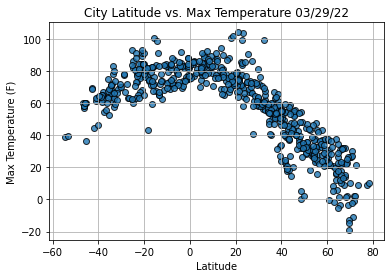

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

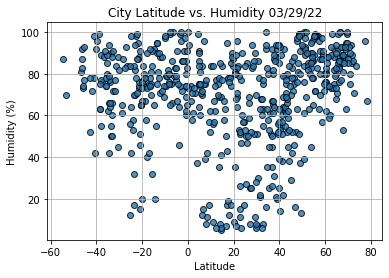

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

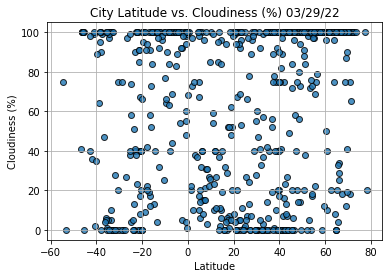

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

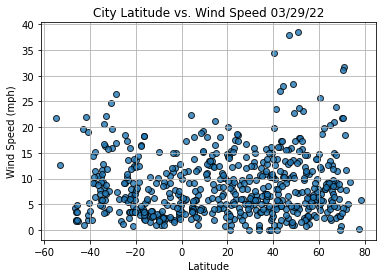

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()
    print(f"r-value: {r_value}")

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        PT
Date          2022-03-29 06:56:43
Lat                       32.6667
Lng                         -17.1
Max Temp                    62.01
Humidity                       75
Cloudiness                     57
Wind Speed                   6.89
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
578     True
579     True
580    False
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jamestown,US,2022-03-29 06:53:08,42.0970,-79.2353,20.71,63,75,6.91
9,Qaanaaq,GL,2022-03-29 06:56:42,77.4840,-69.3632,9.25,96,100,0.25
10,Dingle,PH,2022-03-29 06:56:43,10.9995,122.6711,87.57,56,59,18.16
11,Walla Walla,US,2022-03-29 06:54:35,46.0646,-118.3430,55.76,72,6,10.00
13,Ponta Do Sol,PT,2022-03-29 06:56:43,32.6667,-17.1000,62.01,75,57,6.89


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

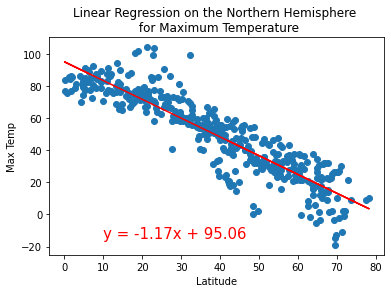

r-value: -0.9023345428801248


In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,-15))

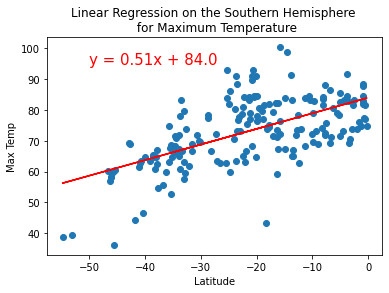

r-value: 0.6077069375832012


In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,95))

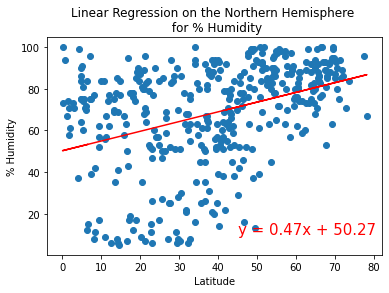

r-value: 0.37384567637190913


In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,10))

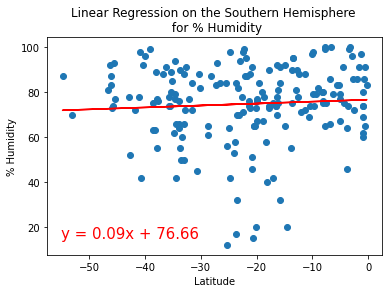

r-value: 0.0660798185993334


In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,15))

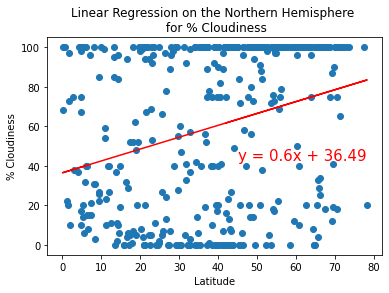

r-value: 0.29264294911360755


In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(45,43))

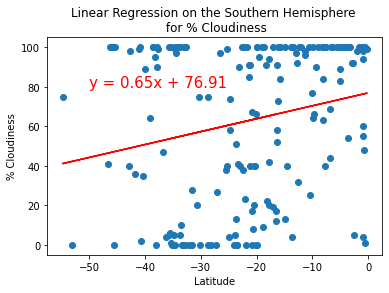

r-value: 0.21680073717324644


In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,80))

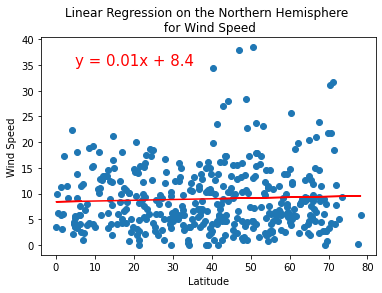

r-value: 0.04577119538447877


In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(5,35))

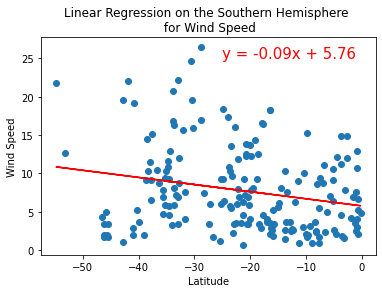

r-value: -0.2242814291046888


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-25,25))